In [1]:
import numpy as np
import matplotlib.pyplot as plt

Método de Euler
---------------


In [16]:
def euler (f,h,y0,t0,tf):
    i = 0
    y_array = [y0]
    t_array = [t0]
    t = t0
    y = y0
    while (t <= tf):
        y = y + h*f(t,y)
        t = t+h
        y_array.append(y)
        t_array.append(t)
    return [y_array,t_array]    
    
    

In [17]:
def f (t,y):
    return t*np.cos(y+t**3)+np.log(t+2)

In [25]:
a = euler(f,0.001,0,0,3)

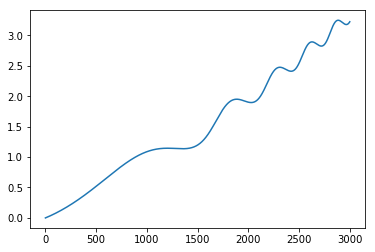

In [26]:
plt.plot(a[0])

Método de Runge-Kutta de orden 4
--------------------------------


In [20]:
def rk4 (f,h,y0,t0,tf):
    y_array = [y0]
    t_array = [t0]
    y = y0
    t = t0
    while t <= tf :
        k1 = f(t,y)
        k2 = f(t+(h/2),y+((h/2)*k1))
        k3 = f(t+(h/2),y+((h/2)*k2))
        k4 = f(t+h,y+(h*k3))
        y = y+((h/6)*(k1+(2*k2)+(2*k3)+k4))
        t += h
        y_array.append(y)
        t_array.append(h)
    return [y_array,t_array]

In [27]:
b = rk4(f,0.001,0,0,3)

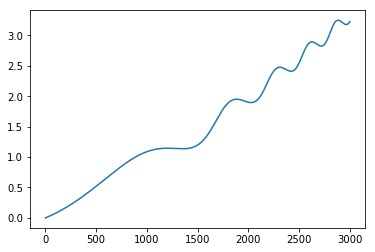

In [28]:
plt.plot(b[0])

Punto 1
-------

